# RULES OF THE PUZZLE 

Three players A, B, C play the following game. First, A picks a real number between 0 and 1 (both inclusive), then B picks a number in the same range (different from A’s choice) and finally C picks a number, also in the same  range, (different from the two chosen numbers). We then pick a number in the range uniformly randomly. Whoever’s number is closest to this random number wins the game. Assume that A, B and C all play optimally and their sole goal is to maximise their chances of winning. Also assume that if one of them has several optimal choices, then that player will randomly pick one of the optimal choices.

- If A chooses 0, then what is the best choice for B?
- What is the best choice for A?
- Can you write a program to figure out the best choice for the first player when the game is played among four players?

## Intuition: 
- Let's call the random number $x$, $x\sim\mathcal{U}([0,1])$ and we know the expected value $\mathbb{E}[x] = \int_0^1 xdx = 0.5$.
    - The expected value should not really influence our choice, we want to maximise our "area" along the line 
    - A good way of visualising this is by considering each player as a circle covering an area of $2R$
        - The player with the biggest circle at the end is most likely to win
- We consider each player as a circle on the line $[0,1]$ 
    - The optimal strategy is picking the point which maximises the radius of the players' circle.
    - As more players join, the midpoint shifts and the circle's radius becomes smaller

### Example
Below we will introduce a player "A" who picks 0.5, followed by a player "B" who picks 0.7 and finally a player "C" who picks 0.1 to show how the dynamic of the game changes per round. In this example B has a 40% chance of winning whereas A and C have a 30% chance each.

In [23]:
# Include all necessary libraries
import matplotlib.pyplot as plt
import math as math
import numpy as np
import game
import player
import line
import random

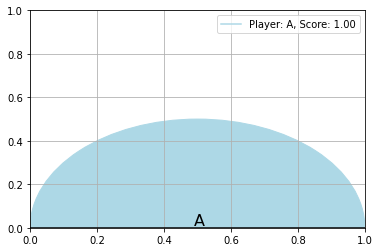

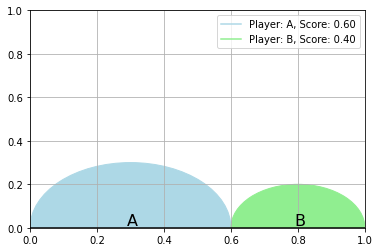

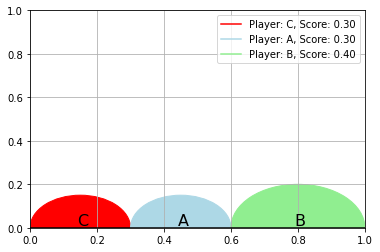

In [24]:
# Create an instance of the line [0,1] named board
board = line.line()
plt.figure()
# Add player with point 0.5
board.add_player(player.player("A", 0.5))
game.plot_circles(board)

plt.figure()
# Add player with point 0.7
board.add_player(player.player("B", 0.7))
game.plot_circles(board)

plt.figure()
# Add player with point 0.1
board.add_player(player.player("C", 0.1))
game.plot_circles(board)

# The scoring system
We will define the scoring system as $2R$.

Consider the scenario where "A" picks 0.0, what is the best move for "B"?

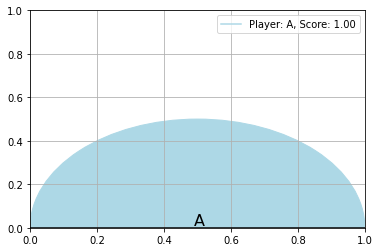

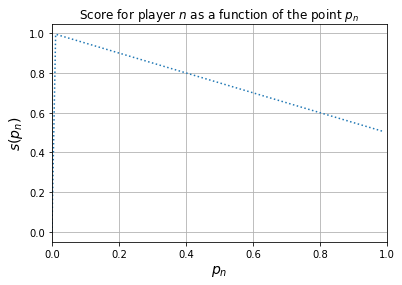

Optimal value for next opponent: 0.010611862976978642


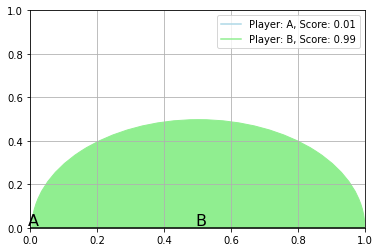

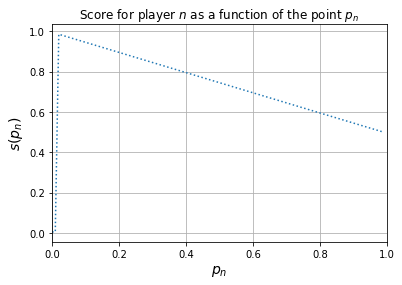

Optimal value for next opponent: 0.019993612510128694


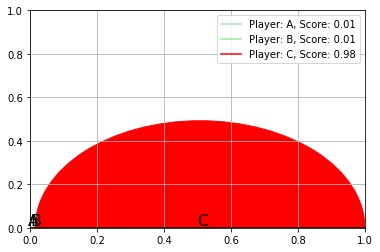

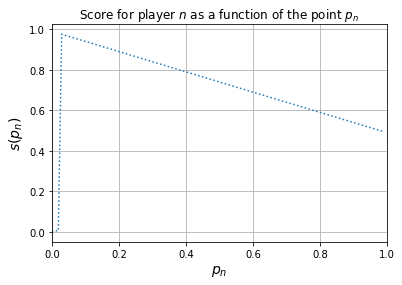

Optimal value for next opponent: 0.028647680507497147


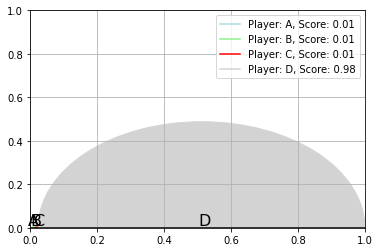

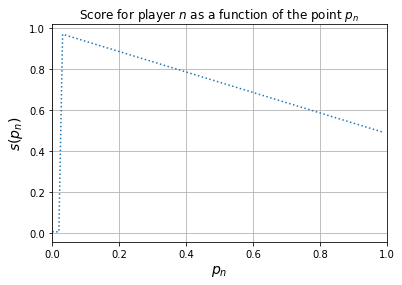

Optimal value for next opponent: 0.03147476444561063


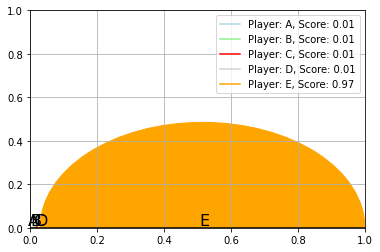

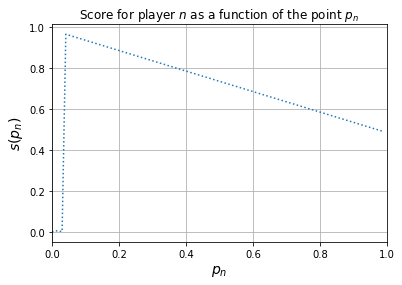

Optimal value for next opponent: 0.041071723731421435


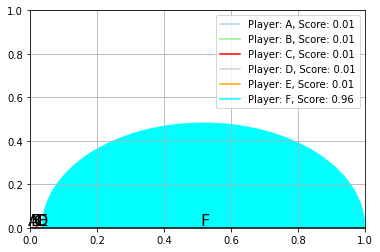

In [26]:
# Create line and player A with 0.5
N = 100 # number of line segments
board = line.line()
# Add player A to the board with point 0.0
board.add_player(player.player('A', 0.0)) 
# Plot the board
plt.figure()
game.plot_circles(board)
# Add 5 optimal playing opponents
for i in range(5):
    # Create a figure
    plt.figure()
    plt.xlabel('$p_n$', fontsize=14)
    plt.ylabel('$s(p_n)$', fontsize=14)
    plt.xlim([0,1])
    plt.title('Score for player $n$ as a function of the point $p_n$')
    # Consider the optimal move for next opponent
    values, scores = game.get_optimal_point(board, N)
    game.plot_scores(values, scores)
    # Get a random max index of the best possible moves
    ind = []
    for s in range(len(scores)):
        if(scores[s] == max(scores)):
            ind.append(values[s])
    # Print optimal value 
    opt_val = random.choice(ind)
    print("Optimal value for next opponent: {}".format(opt_val))

    # Add player with that optimal value
    board.add_player(player.player(chr(65+board.nr_players), opt_val))
    game.plot_circles(board)

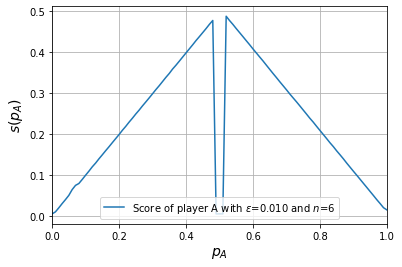

In [28]:
# Test to find the optimal value for player A 
# Discretise line in to segments
N = 100 # Number of line segments
score = []

# Loop through all possible points
for v in range(N+1):
    # Create a line
    board = line.line()
    # Add a player with the given point
    board.add_player(player.player(chr(65+board.nr_players), v/(N+1)))
    # Loop through all opponents 
    for i in range(6):
        # Consider the optimal move for next opponent
        values, scores = game.get_optimal_point(board, N)
        # Get a random max index
        ind = []
        for s in range(len(scores)):
            if(scores[s] == max(scores)):
                ind.append(values[s])
        # Choose (randomly) which best move to take
        opt_val = random.choice(ind)
        # Add player with that optimal value
        board.add_player(player.player(chr(65+board.nr_players), opt_val))
    # Find the score for player A 
    for p in board.players:
        if p.name == 'A':
            score.append(p.get_score())
# Plot the score of player A as a function of the point chosen
plt.plot(np.linspace(0,1,N+1), score, label="Score of player A with $\epsilon$={0:.3f} and $n$={1}".format(1/N, 6))
plt.xlim([0,1])
plt.xlabel('$p_A$', fontsize=14)
plt.ylabel('$s(p_A)$', fontsize=14)
plt.legend()
plt.grid()
plt.show()